In [4]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random 
import os


25000
12500


In [35]:
########################
#print(os.listdir("input/dogs-vs-cats/test"))
print(len(os.listdir('input/dogs-vs-cats/train')))
print(len(os.listdir('input/dogs-vs-cats/test')))

25000
12500


In [7]:
filenames=os.listdir("input/dogs-vs-cats/train/")
categories=[]
for filename in filenames:
    category=filename.split('.')[0]
    if category=='dog':
        categories.append(1)
    else:
        categories.append(0)
        
df=pd.DataFrame({
    'filename':filenames,
    'category':categories
})

In [8]:
########################
df.head()

,filename,category
0,dog.8011.jpg,1
1,cat.5077.jpg,0
2,dog.7322.jpg,1
3,cat.2718.jpg,0
4,cat.10151.jpg,0


In [9]:
########################
df.tail()

,filename,category
24995,dog.8008.jpg,1
24996,dog.1992.jpg,1
24997,dog.12412.jpg,1
24998,cat.2701.jpg,0
24999,cat.10148.jpg,0


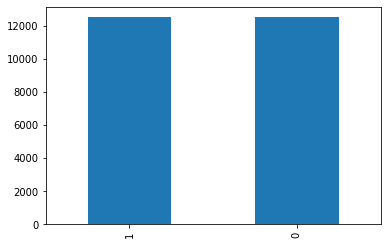

In [10]:
########################
df['category'].value_counts().plot.bar()

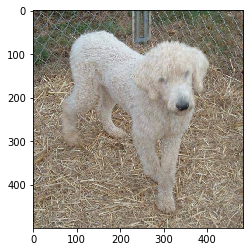

In [59]:
########################
sample=random.choice(filenames)
image=load_img("input/dogs-vs-cats/train/" +sample)
plt.imshow(image)


In [24]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,Activation

image_width=128
image_height=128
image_size=(image_width,image_height)
image_channels=3

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(image_width,image_height,image_channels)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))              #model.add(Dense(2,activation='softmax'))  

model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

model.summary()

from keras.callbacks import EarlyStopping,ReduceLROnPlateau

earlystop=EarlyStopping(patience=10)

learning_rate_reduce=ReduceLROnPlateau(monitor='val_acc',min_lr=0.0001)


callbacks=[earlystop,learning_rate_reduce]

df['category']=df['category'].replace({0:'cat',1:'dog'})

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 128)      

20000 5000


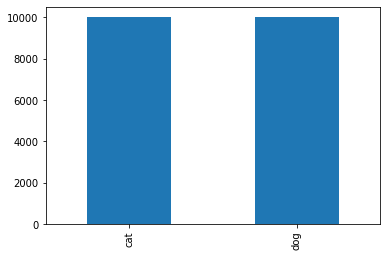

In [29]:
train_df,validate_df=train_test_split(df,test_size=0.20)
train_df=train_df.reset_index(drop=True)
validate_df=validate_df.reset_index(drop=True)

train_df['category'].value_counts().plot.bar()

validate_df['category'].value_counts().plot.bar()

total_train=train_df.shape[0]
total_validate=validate_df.shape[0]

print(total_train,total_validate)

In [34]:
train_datagen=ImageDataGenerator(
rotation_range=15,
rescale=1/255,
zoom_range=0.1,
horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)

train_generator=train_datagen.flow_from_dataframe(train_df,"input/dogs-vs-cats/train/",x_col='filename',y_col='category',target_size=image_size,class_mode='categorical',batch_size=64)

validation_datagen=ImageDataGenerator(
rotation_range=15,
rescale=1/255,
zoom_range=0.1,
horizontal_flip=True,width_shift_range=0.1,height_shift_range=0.1)

valid_generator=validation_datagen.flow_from_dataframe(validate_df,"input/dogs-vs-cats/train/",x_col='filename',y_col='category',target_size=image_size,class_mode='categorical',batch_size=64)

example_df=train_df.sample(n=1).reset_index(drop=True)
example_generator=train_datagen.flow_from_dataframe(
example_df,"input/dogs-vs-cats/train/",x_col='filename',y_col='category',target_size=image_size,class_mode='categorical'


)

batch_size=250
history=model.fit_generator(train_generator,epochs=20,validation_data=valid_generator,validation_steps=total_validate/batch_size,steps_per_epoch=total_train/batch_size,callbacks=callbacks)

Found 20000 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.
Found 1 validated image filenames belonging to 1 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
80/80 [==============================] - 565s 7s/step - loss: 0.8508 - accuracy: 0.5130 - val_loss: 0.6675 - val_accuracy: 0.6047
Epoch 2/20
80/80 [==============================] - 419s 5s/step - loss: 0.6659 - accuracy: 0.5723 - val_loss: 0.6545 - val_accuracy: 0.6047
Epoch 3/20
80/80 [==============================] - 649s 8s/step - loss: 0.6725 - accuracy: 0.5711 - val_loss: 0.6718 - val_accuracy: 0.5938
Epoch 4/20
80/80 [==============================] - 372s 5s/step - loss: 0.6593 - accuracy: 0.6143 - val_loss: 0.6685 - val_accuracy: 0.5852
Epoch 5/20
80/80 [==============================] - 384s 5s/step - loss: 0.6663 - accuracy: 0.6038 - val_loss: 0.6618 - val_accuracy: 0.6102
Epoch 6/20
80/80 [====================

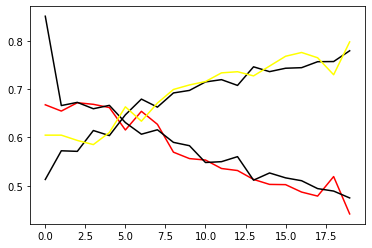

In [36]:
plt.plot(history.history['val_loss'],color='r')
plt.plot(history.history['accuracy'],color='black')
plt.plot(history.history['loss'],color='black')
plt.plot(history.history['val_accuracy'],color='yellow')
plt.show()


12500
Found 12500 validated image filenames.
Instructions for updating:
Please use Model.predict, which supports generators.


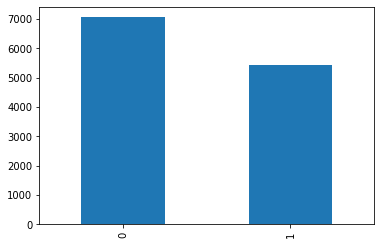

In [37]:
test_filenames=os.listdir('input/dogs-vs-cats/test')

test_df=pd.DataFrame({
    'filename':test_filenames
})
print(len(os.listdir('input/dogs-vs-cats/test')))


test_gen=ImageDataGenerator(rescale=1/255)

test_generator=test_gen.flow_from_dataframe(
test_df,'input/dogs-vs-cats/test/',x_col='filename',y_col=None,class_mode=None,target_size=image_size,batch_size=64,shuffle=False)


predict=model.predict_generator(test_generator)

test_df['category']=np.argmax(predict,axis=-1)
label_map=dict((v,k) for k,v in train_generator.class_indices.items())

test_df['category']=test_df['category'].replace(label_map)


test_df['category']=test_df['category'].replace({'dog':1,'cat':0})
test_df['category'].value_counts().plot.bar()

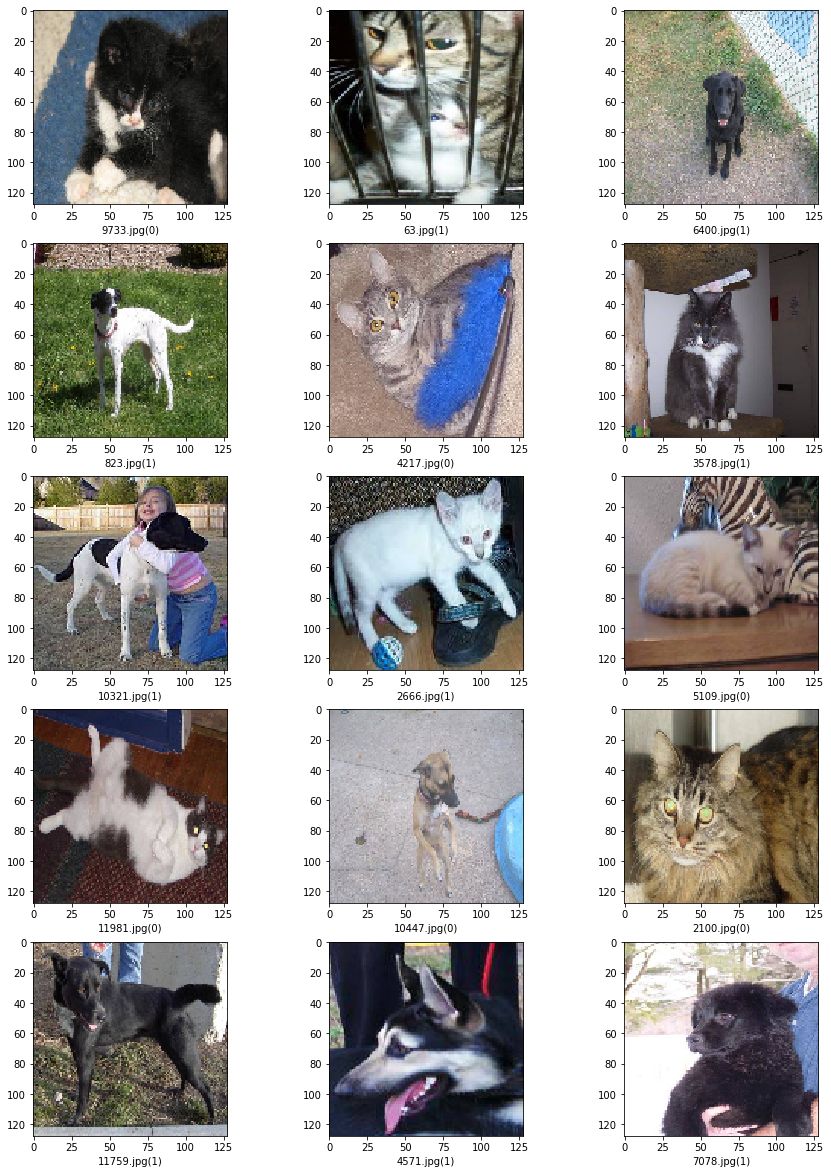

In [48]:
sample_test=test_df.head(15)
sample_test.head()
plt.figure(figsize=(15,25))
for index,row in sample_test.iterrows():
    filename=row['filename']
    category=row['category']
    img=load_img('input/dogs-vs-cats/test/'+ filename,target_size=image_size)
    plt.subplot(6,3,index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')')
    
plt.show()

In [ ]:
submission_df=test_df.copy()
submission_df['id']=submission_df['filename'].str.split('.').str[0]
submission_df['label']=submission_df['category']
submission_df.drop(['filename','category'],axis=1,inplace=True)
submission_df.to_csv('submission.csv',index=False)